In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Define path 
path=(r"C:\Users\hardjan\Retail Supermarket")

In [4]:
# Importing Data set 
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'samplesuperstore1.csv'), index_col = False)

In [5]:
df.shape

(9994, 14)

In [6]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,date
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2/27/2018
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,4/15/2015
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,6/12/2018
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,8/19/2015
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,1/13/2018


### 03. The Elbow technique 

In [7]:
df_numeric=df[['Quantity','Discount', 'Sales', 'Profit']]

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
df_numeric.columns.to_list()

['Quantity', 'Discount', 'Sales', 'Profit']

In [11]:
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[-4430069250.260376,
 -2466689485.446174,
 -1444371627.823347,
 -1010306398.2472998,
 -811497182.4491593,
 -671110061.229513,
 -565218872.4019842,
 -463437336.9304307,
 -386759359.51813596]

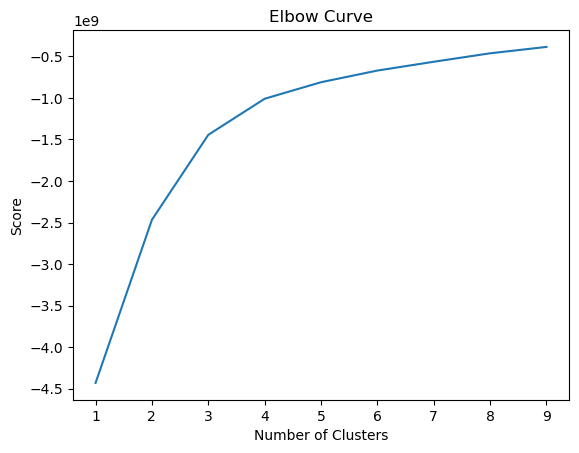

In [12]:
# plots the scores for each iteration, with varying number of clusters
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [13]:
kmeans = KMeans(n_clusters=3)

In [14]:
kmeans.fit(df_numeric)

C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
df_numeric['cluster'] = kmeans.fit_predict(df_numeric)

C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hardjan\AppData\Local\Temp\ipykernel_18228\2572733152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['cluster'] = kmeans.fit_predict(df_numeric)


In [16]:
df_numeric['cluster'].value_counts()

cluster
0    9511
2     468
1      15
Name: count, dtype: int64

In [17]:
df.head(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,date
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136,2/27/2018


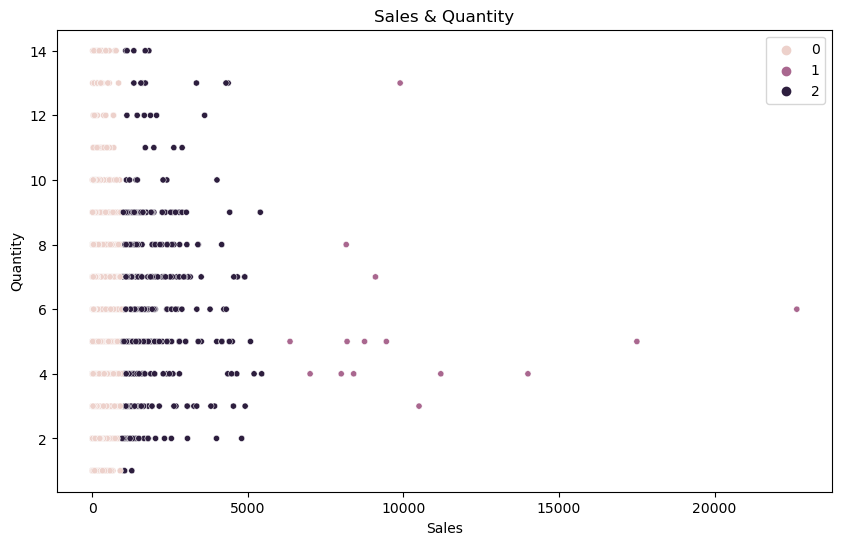

In [18]:
# chart scatterplot for Sales and Quantity
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['Sales'], y=df_numeric['Quantity'], hue=kmeans.labels_, s=20)
plt.title('Sales & Quantity')
plt.xlabel('Sales')
plt.ylabel('Quantity')
ax.grid(False)
plt.show()

##### The Sales and quantity are correlational that means that there is a similar quantity of sales which have fair prices indicating number 0 and  number 2.  The products that have higher prices have lesser quantity of Sales indicating the number 1 here. 

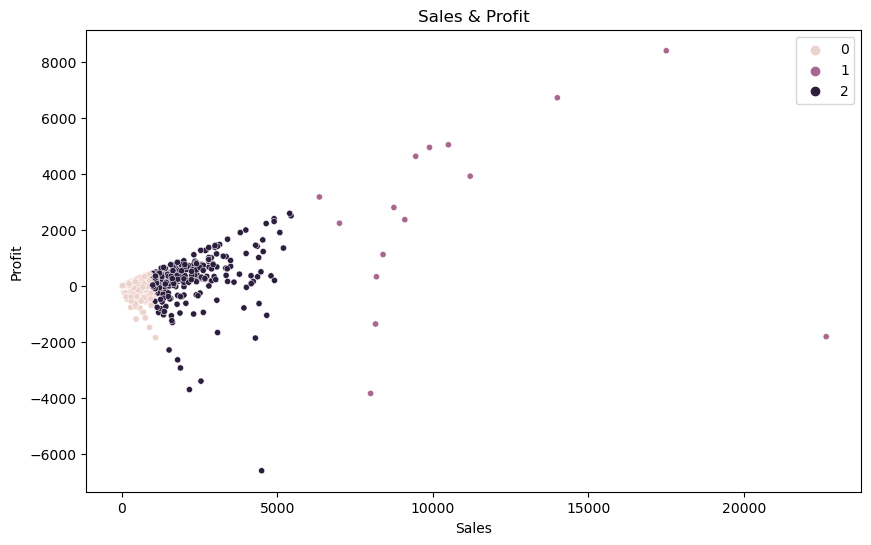

In [19]:
# chart scatterplot for Sales and Profit.
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['Sales'], y=df_numeric['Profit'], hue=kmeans.labels_, s=20)
plt.title('Sales & Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
ax.grid(False)
plt.show()

##### There are not a very strong relationship between Sales and Profit.

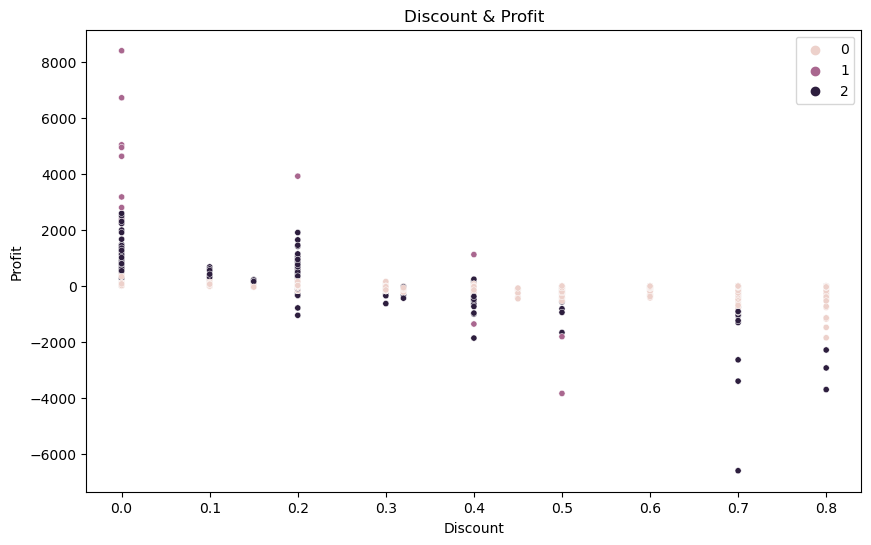

In [20]:
# chart scatterplot for Discount and Profit 
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['Discount'], y=df_numeric['Profit'], hue=kmeans.labels_, s=20)
plt.title('Discount & Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
ax.grid(False)
plt.show()

##### 06. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [21]:
# create the  K-means object 

kmeans = KMeans(n_clusters = 3) 


In [23]:
# Fit the k-means object to the data.

kmeans.fit(df_numeric)

C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hardjan\AppData\Local\Temp\ipykernel_18228\1738728002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['clusters'] = kmeans.fit_predict(df_numeric)


In [26]:
df_numeric.head()

,Quantity,Discount,Sales,Profit,cluster,clusters
0,2,0.00,261.9600,41.9136,0,0
1,3,0.00,731.9400,219.5820,0,0
2,2,0.00,14.6200,6.8714,0,0
3,5,0.45,957.5775,-383.0310,0,0
4,2,0.20,22.3680,2.5164,0,0


In [27]:
df_numeric['clusters'].value_counts()

clusters
0    9511
1     468
2      15
Name: count, dtype: int64

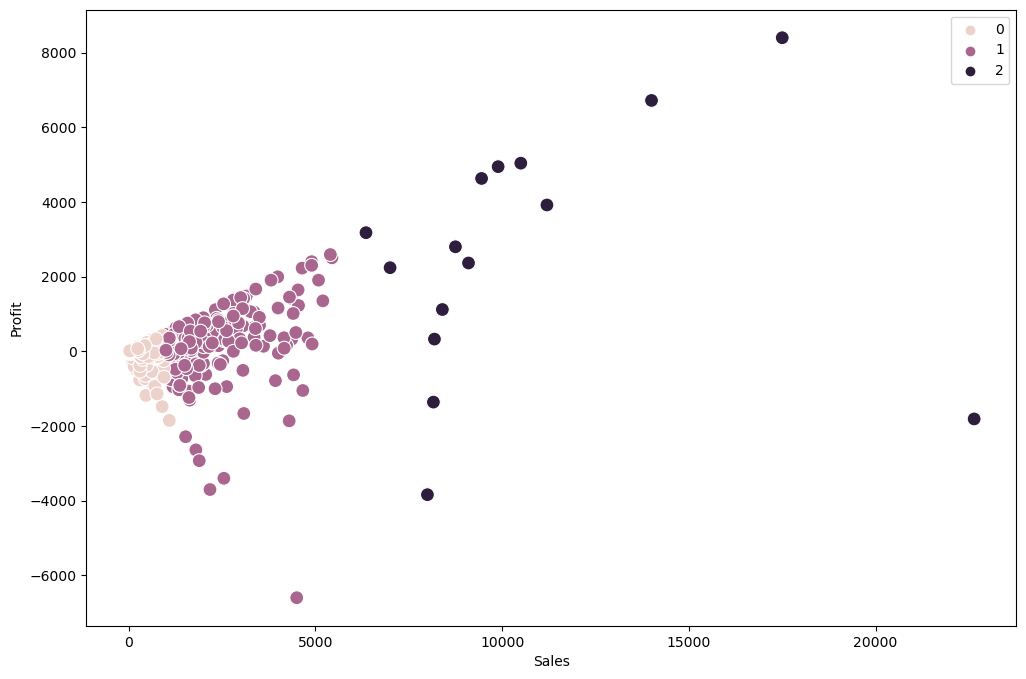

In [28]:
# Plot the clusters for the "Profit" and "Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Sales'], y=df['Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sales') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.show()

#### The Scatterplot isn't making too much of sense here and the picture is not very clear as to that profit and sales are having a strong relationship.

In [30]:
df_numeric.loc[df_numeric['clusters'] == 2, 'cluster'] = 'dark purple'
df_numeric.loc[df_numeric['clusters'] == 1, 'cluster'] = 'purple'
df_numeric.loc[df_numeric['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\hardjan\AppData\Local\Temp\ipykernel_18228\4262399667.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_numeric.loc[df_numeric['clusters'] == 2, 'cluster'] = 'dark purple'


In [32]:
df_numeric.groupby('clusters').agg({'Sales':['mean', 'median'], 
                         'Quantity':['mean', 'median'], 
                         'Discount':['mean', 'median'],
                          'Profit':['mean', 'median']})

Sales            Quantity         Discount         \
                  mean    median      mean median      mean median   
clusters                                                             
0           135.899836    47.952  3.683419    3.0  0.157550   0.20   
1          1806.675550  1472.530  5.893162    5.0  0.129551   0.05   
2         10608.891067  9099.930  5.466667    5.0  0.133333   0.00   

               Profit             
                 mean     median  
clusters                          
0           13.812211     7.9794  
1          248.616325   272.1056  
2         2578.443113  2799.9840